## Importing Libraries

In [ ]:
import networkx as nx
import math
import numpy as np,numpy.random
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

## Importing Dataset

In [ ]:
df=pd.read_csv('musae_squirrel_edges.csv')
df2=pd.read_csv('twitter.csv')

## Preprocessing

In [ ]:
df.rename(columns={"id1": "From", "id2": "To"},inplace=True)

In [ ]:
G = nx.from_pandas_edgelist(df,source="From",target="To")

## Round 2 - Problem 1.1 : Finding Ng/N

In [ ]:
# For Dataset1 for Wikipedia
N = G.number_of_nodes()
E = G.number_of_edges()
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
Ng = len(Gcc[0])

In [ ]:
print("The number of nodes in the graph are (N) : ",N)
print("The number of nodes in the Giant component of the graph are (Ng) : ",Ng)
print("The ratio of Ng/N is : ",Ng/N)

The number of nodes in the graph are (N) :  5203
The number of nodes in the Giant component of the graph are (Ng) :  5203
The ratio of Ng/N is :  1.0


## Round 2 - Problem 1.2.1 : Girvan Newman Divisive Clustering Algorithm

### Defining Functions

In [ ]:
def edge_to_remove(g):
      
    d1 = nx.edge_betweenness_centrality(g)
    list_of_tuples = list(d1.items())
      
    sorted(list_of_tuples, key = lambda x:x[1], reverse = True)
      
    # Will return in the form (a,b)
    return list_of_tuples[0][0]
  

In [ ]:
def girvan(g,no_of_itr,edge_remove,print_edge):

    
    itr = 0
    lena = 0
    print("----------------------ITERATION",itr,"-----------------------")
    a = nx.connected_components(G)
    
    for i in a:
        lena += 1
        print("Community",lena," Number of nodes",len(i),"Nodes : ",i)
           

          
    print ('Itr',itr,' The number of connected components are ', lena)
    print('Itr',itr,' The number of edges are ', G.number_of_edges())
    nx.draw(G,node_size=10)
    plt.show()
    print()
    print()
    
    itr += 1;
    
    while (itr<=no_of_itr):
        print("----------------------ITERATION",itr,"-----------------------")
        to_remove = edge_remove
        while(to_remove):
  
            u, v = edge_to_remove(g)
            if(print_edge):
                print("Edge removed ",u," to ",v)
            g.remove_edge(u, v) 
            to_remove = to_remove -1;
          
        a = nx.connected_components(g)
        lena = 0

        for i in a:
            lena += 1
            print("Community",lena," Number of nodes",len(i),"Nodes : ",i)
              
       
        print ('Itr',itr,' The number of connected components are ', lena)
        print('Itr',itr,' The number of edges are ', G.number_of_edges())
        nx.draw(G,node_size=10)
        plt.show()
        print()
        print()
        
        itr += 1;

    return g,a

### Execution 1 : 100 nodes , 6 iterations , remove 1 edge per iteration

----------------------ITERATION 0 -----------------------
Community 1  Number of nodes 10 Nodes :  {2849, 3106, 808, 4555, 3563, 4855, 817, 3475, 1527, 3327}
Community 2  Number of nodes 27 Nodes :  {2820, 5125, 3852, 4365, 402, 3730, 4758, 792, 4903, 3891, 5050, 4419, 3908, 3909, 715, 5196, 4434, 4088, 4066, 3691, 4847, 4598, 4471, 5112, 4730, 4346, 5115}
Community 3  Number of nodes 13 Nodes :  {5057, 4481, 3975, 2408, 2539, 4236, 3372, 4303, 4658, 3829, 5078, 313, 4410}
Community 4  Number of nodes 16 Nodes :  {5122, 1316, 5093, 4965, 777, 4650, 5194, 2219, 3630, 3603, 3253, 3413, 4664, 3609, 4989, 4862}
Community 5  Number of nodes 5 Nodes :  {169, 5067, 2930, 3700, 2238}
Community 6  Number of nodes 12 Nodes :  {4544, 2371, 5123, 1481, 2890, 1039, 3668, 1654, 1883, 4796, 2173, 3644}
Community 7  Number of nodes 3 Nodes :  {5074, 2972, 2958}
Community 8  Number of nodes 21 Nodes :  {5121, 514, 5126, 3078, 4616, 1548, 4621, 5132, 4625, 4627, 2068, 4629, 5142, 4120, 5145, 5146, 5148,

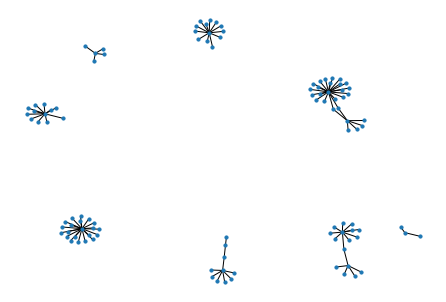



----------------------ITERATION 1 -----------------------
Community 1  Number of nodes 9 Nodes :  {3106, 808, 4555, 3563, 4855, 817, 3475, 1527, 3327}
Community 2  Number of nodes 1 Nodes :  {2849}
Community 3  Number of nodes 27 Nodes :  {2820, 5125, 3852, 4365, 402, 3730, 4758, 792, 4903, 3891, 5050, 4419, 3908, 3909, 715, 5196, 4434, 4088, 4066, 3691, 4847, 4598, 4471, 5112, 4730, 4346, 5115}
Community 4  Number of nodes 13 Nodes :  {5057, 4481, 3975, 2408, 2539, 4236, 3372, 4303, 4658, 3829, 5078, 313, 4410}
Community 5  Number of nodes 16 Nodes :  {5122, 1316, 5093, 4965, 777, 4650, 5194, 2219, 3630, 3603, 3253, 3413, 4664, 3609, 4989, 4862}
Community 6  Number of nodes 5 Nodes :  {169, 5067, 2930, 3700, 2238}
Community 7  Number of nodes 12 Nodes :  {4544, 2371, 5123, 1481, 2890, 1039, 3668, 1654, 1883, 4796, 2173, 3644}
Community 8  Number of nodes 3 Nodes :  {5074, 2972, 2958}
Community 9  Number of nodes 21 Nodes :  {5121, 514, 5126, 3078, 4616, 1548, 4621, 5132, 4625, 4627,

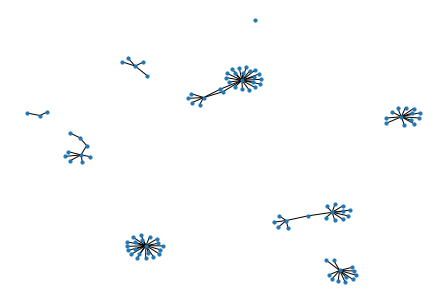



----------------------ITERATION 2 -----------------------
Community 1  Number of nodes 8 Nodes :  {808, 4555, 3563, 4855, 817, 3475, 1527, 3327}
Community 2  Number of nodes 1 Nodes :  {2849}
Community 3  Number of nodes 1 Nodes :  {3106}
Community 4  Number of nodes 27 Nodes :  {2820, 5125, 3852, 4365, 402, 3730, 4758, 792, 4903, 3891, 5050, 4419, 3908, 3909, 715, 5196, 4434, 4088, 4066, 3691, 4847, 4598, 4471, 5112, 4730, 4346, 5115}
Community 5  Number of nodes 13 Nodes :  {5057, 4481, 3975, 2408, 2539, 4236, 3372, 4303, 4658, 3829, 5078, 313, 4410}
Community 6  Number of nodes 16 Nodes :  {5122, 1316, 5093, 4965, 777, 4650, 5194, 2219, 3630, 3603, 3253, 3413, 4664, 3609, 4989, 4862}
Community 7  Number of nodes 5 Nodes :  {169, 5067, 2930, 3700, 2238}
Community 8  Number of nodes 12 Nodes :  {4544, 2371, 5123, 1481, 2890, 1039, 3668, 1654, 1883, 4796, 2173, 3644}
Community 9  Number of nodes 3 Nodes :  {5074, 2972, 2958}
Community 10  Number of nodes 21 Nodes :  {5121, 514, 5126,

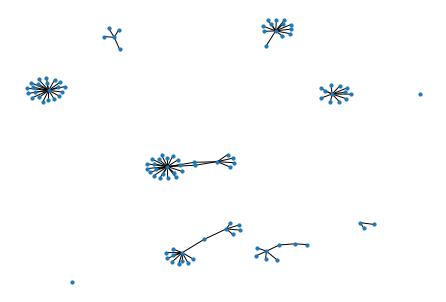



----------------------ITERATION 3 -----------------------
Community 1  Number of nodes 7 Nodes :  {3563, 4555, 4855, 817, 3475, 1527, 3327}
Community 2  Number of nodes 1 Nodes :  {2849}
Community 3  Number of nodes 1 Nodes :  {3106}
Community 4  Number of nodes 1 Nodes :  {808}
Community 5  Number of nodes 27 Nodes :  {2820, 5125, 3852, 4365, 402, 3730, 4758, 792, 4903, 3891, 5050, 4419, 3908, 3909, 715, 5196, 4434, 4088, 4066, 3691, 4847, 4598, 4471, 5112, 4730, 4346, 5115}
Community 6  Number of nodes 13 Nodes :  {5057, 4481, 3975, 2408, 2539, 4236, 3372, 4303, 4658, 3829, 5078, 313, 4410}
Community 7  Number of nodes 16 Nodes :  {5122, 1316, 5093, 4965, 777, 4650, 5194, 2219, 3630, 3603, 3253, 3413, 4664, 3609, 4989, 4862}
Community 8  Number of nodes 5 Nodes :  {169, 5067, 2930, 3700, 2238}
Community 9  Number of nodes 12 Nodes :  {4544, 2371, 5123, 1481, 2890, 1039, 3668, 1654, 1883, 4796, 2173, 3644}
Community 10  Number of nodes 3 Nodes :  {5074, 2972, 2958}
Community 11  Num

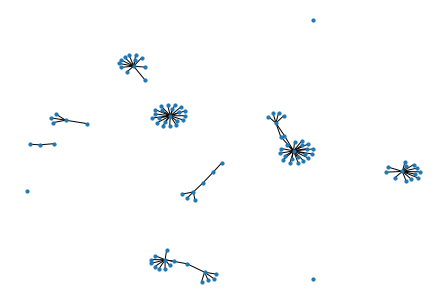



----------------------ITERATION 4 -----------------------
Community 1  Number of nodes 6 Nodes :  {3563, 4855, 817, 3475, 1527, 3327}
Community 2  Number of nodes 1 Nodes :  {2849}
Community 3  Number of nodes 1 Nodes :  {3106}
Community 4  Number of nodes 1 Nodes :  {808}
Community 5  Number of nodes 1 Nodes :  {4555}
Community 6  Number of nodes 27 Nodes :  {2820, 5125, 3852, 4365, 402, 3730, 4758, 792, 4903, 3891, 5050, 4419, 3908, 3909, 715, 5196, 4434, 4088, 4066, 3691, 4847, 4598, 4471, 5112, 4730, 4346, 5115}
Community 7  Number of nodes 13 Nodes :  {5057, 4481, 3975, 2408, 2539, 4236, 3372, 4303, 4658, 3829, 5078, 313, 4410}
Community 8  Number of nodes 16 Nodes :  {5122, 1316, 5093, 4965, 777, 4650, 5194, 2219, 3630, 3603, 3253, 3413, 4664, 3609, 4989, 4862}
Community 9  Number of nodes 5 Nodes :  {169, 5067, 2930, 3700, 2238}
Community 10  Number of nodes 12 Nodes :  {4544, 2371, 5123, 1481, 2890, 1039, 3668, 1654, 1883, 4796, 2173, 3644}
Community 11  Number of nodes 3 Nod

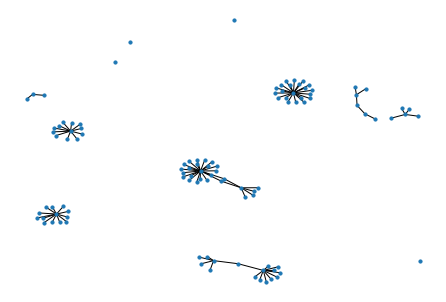



----------------------ITERATION 5 -----------------------
Community 1  Number of nodes 3 Nodes :  {1527, 3475, 3327}
Community 2  Number of nodes 1 Nodes :  {2849}
Community 3  Number of nodes 1 Nodes :  {3106}
Community 4  Number of nodes 1 Nodes :  {808}
Community 5  Number of nodes 1 Nodes :  {4555}
Community 6  Number of nodes 3 Nodes :  {817, 3563, 4855}
Community 7  Number of nodes 27 Nodes :  {2820, 5125, 3852, 4365, 402, 3730, 4758, 792, 4903, 3891, 5050, 4419, 3908, 3909, 715, 5196, 4434, 4088, 4066, 3691, 4847, 4598, 4471, 5112, 4730, 4346, 5115}
Community 8  Number of nodes 13 Nodes :  {5057, 4481, 3975, 2408, 2539, 4236, 3372, 4303, 4658, 3829, 5078, 313, 4410}
Community 9  Number of nodes 16 Nodes :  {5122, 1316, 5093, 4965, 777, 4650, 5194, 2219, 3630, 3603, 3253, 3413, 4664, 3609, 4989, 4862}
Community 10  Number of nodes 5 Nodes :  {169, 5067, 2930, 3700, 2238}
Community 11  Number of nodes 12 Nodes :  {4544, 2371, 5123, 1481, 2890, 1039, 3668, 1654, 1883, 4796, 2173,

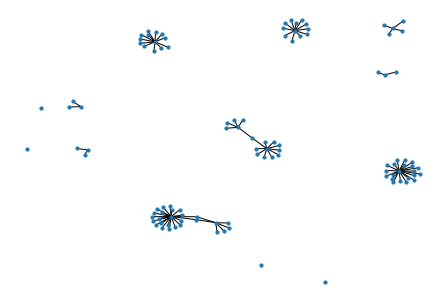



----------------------ITERATION 6 -----------------------
Community 1  Number of nodes 2 Nodes :  {3475, 3327}
Community 2  Number of nodes 1 Nodes :  {2849}
Community 3  Number of nodes 1 Nodes :  {3106}
Community 4  Number of nodes 1 Nodes :  {808}
Community 5  Number of nodes 1 Nodes :  {4555}
Community 6  Number of nodes 3 Nodes :  {817, 3563, 4855}
Community 7  Number of nodes 1 Nodes :  {1527}
Community 8  Number of nodes 27 Nodes :  {2820, 5125, 3852, 4365, 402, 3730, 4758, 792, 4903, 3891, 5050, 4419, 3908, 3909, 715, 5196, 4434, 4088, 4066, 3691, 4847, 4598, 4471, 5112, 4730, 4346, 5115}
Community 9  Number of nodes 13 Nodes :  {5057, 4481, 3975, 2408, 2539, 4236, 3372, 4303, 4658, 3829, 5078, 313, 4410}
Community 10  Number of nodes 16 Nodes :  {5122, 1316, 5093, 4965, 777, 4650, 5194, 2219, 3630, 3603, 3253, 3413, 4664, 3609, 4989, 4862}
Community 11  Number of nodes 5 Nodes :  {169, 5067, 2930, 3700, 2238}
Community 12  Number of nodes 12 Nodes :  {4544, 2371, 5123, 1481,

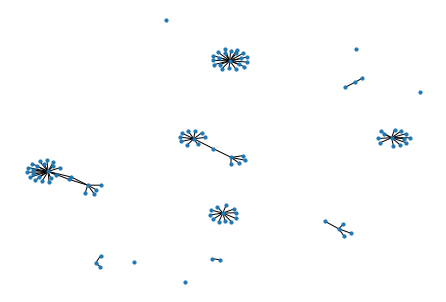

In [ ]:
dataset=df.head(100)
G = nx.from_pandas_edgelist(dataset,source="From",target="To")
G,A = girvan(G,6,1,False)

### Execution 2 : 1000 nodes , 6 iterations , remove 1 edge per iteration

----------------------ITERATION 0 -----------------------
Community 1  Number of nodes 355 Nodes :  {2068.0, 4120.0, 4128.0, 4129.0, 2089.0, 4142.0, 2103.0, 4158.0, 4160.0, 64.0, 2119, 4183.0, 4088.0, 4207.0, 4208.0, 4217.0, 4219.0, 2173.0, 4232.0, 4236.0, 4251.0, 4260.0, 4267.0, 2219.0, 4275.0, 4284.0, 4295.0, 4303.0, 4319.0, 4320.0, 4321.0, 4322.0, 4329.0, 4346.0, 4347.0, 2304.0, 2305.0, 4365.0, 4369.0, 4380.0, 4382.0, 4391.0, 2344.0, 2349.0, 4398.0, 2352.0, 4406.0, 4408.0, 313.0, 4410.0, 4414.0, 4419.0, 2371.0, 4428.0, 4431.0, 4434.0, 2389.0, 4439.0, 4449.0, 2402.0, 4450.0, 2404.0, 2408.0, 4465.0, 2420.0, 4471.0, 4475.0, 380.0, 4476.0, 4481.0, 390, 402, 4528.0, 4530.0, 4542.0, 4543.0, 4544.0, 4545.0, 450.0, 2500.0, 4551.0, 4555.0, 4564.0, 4567.0, 2523, 4571.0, 4574.0, 4585.0, 2539.0, 4587.0, 4591.0, 4595.0, 4598.0, 514.0, 4616.0, 4621.0, 4625.0, 4627.0, 4629.0, 4638.0, 4640.0, 4650.0, 4658.0, 4660.0, 4664, 4665.0, 573.0, 2626, 587.0, 4687.0, 4698.0, 613.0, 4713.0, 4721, 2677.0, 4727

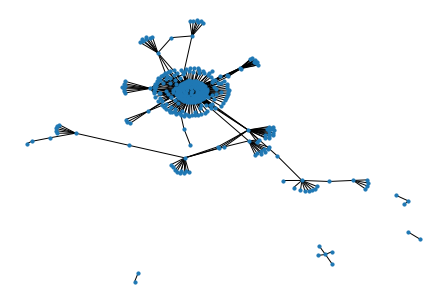



----------------------ITERATION 1 -----------------------
Edge removed  3475  to  2849.0
Edge removed  3475  to  3106.0
Edge removed  3475  to  808.0
Edge removed  3475  to  4555.0
Edge removed  3475  to  3563.0
Community 1  Number of nodes 3 Nodes :  {1527.0, 3475, 3327.0}
Community 2  Number of nodes 1 Nodes :  {2849.0}
Community 3  Number of nodes 1 Nodes :  {3106.0}
Community 4  Number of nodes 1 Nodes :  {808.0}
Community 5  Number of nodes 346 Nodes :  {2068.0, 4120.0, 4128.0, 4129.0, 2089.0, 4142.0, 2103.0, 4158.0, 4160.0, 64.0, 2119, 4183.0, 4088.0, 4207.0, 4208.0, 4217.0, 4219.0, 2173.0, 4232.0, 4236.0, 4251.0, 4260.0, 4267.0, 2219.0, 4275.0, 4284.0, 4295.0, 4303.0, 4319.0, 4320.0, 4321.0, 4322.0, 4329.0, 4346.0, 4347.0, 2304.0, 2305.0, 4365.0, 4369.0, 4380.0, 4382.0, 4391.0, 2344.0, 2349.0, 4398.0, 2352.0, 4406.0, 4408.0, 313.0, 4410.0, 4414.0, 4419.0, 2371.0, 4428.0, 4431.0, 4434.0, 2389.0, 4439.0, 4449.0, 2402.0, 4450.0, 2404.0, 2408.0, 4465.0, 2420.0, 4471.0, 4475.0, 380

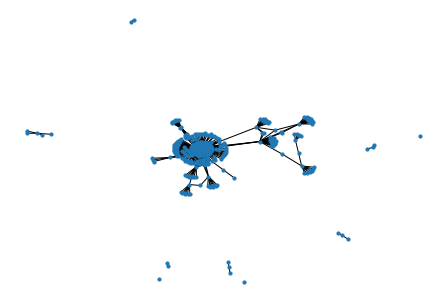



----------------------ITERATION 2 -----------------------
Edge removed  3475  to  1527.0
Edge removed  3475  to  3327.0
Edge removed  4555.0  to  2021
Edge removed  3563.0  to  817
Edge removed  402  to  4066.0
Community 1  Number of nodes 1 Nodes :  {3475}
Community 2  Number of nodes 1 Nodes :  {2849.0}
Community 3  Number of nodes 1 Nodes :  {3106.0}
Community 4  Number of nodes 1 Nodes :  {808.0}
Community 5  Number of nodes 1 Nodes :  {4555.0}
Community 6  Number of nodes 1 Nodes :  {3563.0}
Community 7  Number of nodes 1 Nodes :  {1527.0}
Community 8  Number of nodes 1 Nodes :  {3327.0}
Community 9  Number of nodes 344 Nodes :  {2068.0, 4120.0, 4128.0, 4129.0, 2089.0, 4142.0, 2103.0, 4158.0, 4160.0, 64.0, 2119, 4183.0, 4088.0, 4207.0, 4208.0, 4217.0, 4219.0, 2173.0, 4232.0, 4236.0, 4251.0, 4260.0, 4267.0, 2219.0, 4275.0, 4284.0, 4295.0, 4303.0, 4319.0, 4320.0, 4321.0, 4322.0, 4329.0, 4346.0, 4347.0, 2304.0, 2305.0, 4365.0, 4369.0, 4380.0, 4382.0, 4391.0, 2344.0, 2349.0, 4398.0,

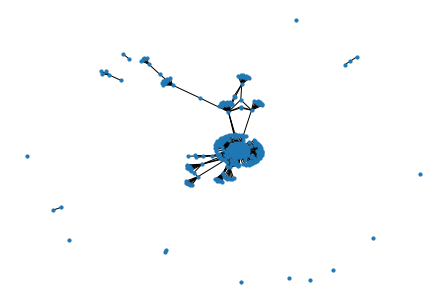



----------------------ITERATION 3 -----------------------
Edge removed  402  to  3908.0
Edge removed  402  to  2820.0
Edge removed  402  to  4903.0
Edge removed  402  to  715.0
Edge removed  402  to  5112.0
Community 1  Number of nodes 1 Nodes :  {3475}
Community 2  Number of nodes 1 Nodes :  {2849.0}
Community 3  Number of nodes 1 Nodes :  {3106.0}
Community 4  Number of nodes 1 Nodes :  {808.0}
Community 5  Number of nodes 1 Nodes :  {4555.0}
Community 6  Number of nodes 1 Nodes :  {3563.0}
Community 7  Number of nodes 1 Nodes :  {1527.0}
Community 8  Number of nodes 1 Nodes :  {3327.0}
Community 9  Number of nodes 1 Nodes :  {402}
Community 10  Number of nodes 1 Nodes :  {4066.0}
Community 11  Number of nodes 341 Nodes :  {2068.0, 4120.0, 4128.0, 4129.0, 2089.0, 4142.0, 2103.0, 4158.0, 4160.0, 64.0, 2119, 4183.0, 4088.0, 4207.0, 4208.0, 4217.0, 4219.0, 2173.0, 4232.0, 4236.0, 4251.0, 4260.0, 4267.0, 2219.0, 4275.0, 4284.0, 4295.0, 4303.0, 4319.0, 4320.0, 4321.0, 4322.0, 4329.0, 43

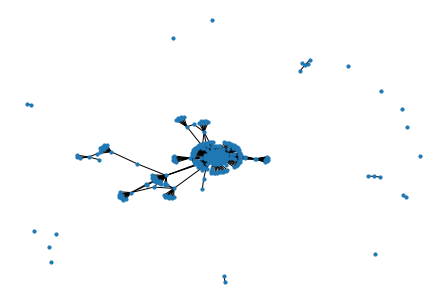



----------------------ITERATION 4 -----------------------
Edge removed  3908.0  to  3310
Edge removed  3908.0  to  912
Edge removed  3908.0  to  2523
Edge removed  3908.0  to  4721
Edge removed  3908.0  to  5121
Community 1  Number of nodes 1 Nodes :  {3475}
Community 2  Number of nodes 1 Nodes :  {2849.0}
Community 3  Number of nodes 1 Nodes :  {3106.0}
Community 4  Number of nodes 1 Nodes :  {808.0}
Community 5  Number of nodes 1 Nodes :  {4555.0}
Community 6  Number of nodes 1 Nodes :  {3563.0}
Community 7  Number of nodes 1 Nodes :  {1527.0}
Community 8  Number of nodes 1 Nodes :  {3327.0}
Community 9  Number of nodes 1 Nodes :  {402}
Community 10  Number of nodes 1 Nodes :  {4066.0}
Community 11  Number of nodes 1 Nodes :  {3908.0}
Community 12  Number of nodes 1 Nodes :  {2820.0}
Community 13  Number of nodes 340 Nodes :  {2068.0, 4120.0, 4128.0, 4129.0, 2089.0, 4142.0, 2103.0, 4158.0, 4160.0, 64.0, 2119, 4183.0, 4088.0, 4207.0, 4208.0, 4217.0, 4219.0, 2173.0, 4232.0, 4236.0, 4

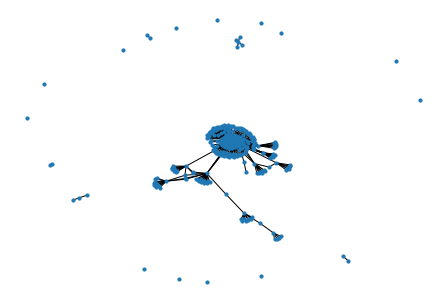



----------------------ITERATION 5 -----------------------
Edge removed  4903.0  to  3691
Edge removed  4903.0  to  3310
Edge removed  4903.0  to  912
Edge removed  4903.0  to  2523
Edge removed  4903.0  to  4721
Community 1  Number of nodes 1 Nodes :  {3475}
Community 2  Number of nodes 1 Nodes :  {2849.0}
Community 3  Number of nodes 1 Nodes :  {3106.0}
Community 4  Number of nodes 1 Nodes :  {808.0}
Community 5  Number of nodes 1 Nodes :  {4555.0}
Community 6  Number of nodes 1 Nodes :  {3563.0}
Community 7  Number of nodes 1 Nodes :  {1527.0}
Community 8  Number of nodes 1 Nodes :  {3327.0}
Community 9  Number of nodes 1 Nodes :  {402}
Community 10  Number of nodes 1 Nodes :  {4066.0}
Community 11  Number of nodes 1 Nodes :  {3908.0}
Community 12  Number of nodes 1 Nodes :  {2820.0}
Community 13  Number of nodes 340 Nodes :  {2068.0, 4120.0, 4128.0, 4129.0, 2089.0, 4142.0, 2103.0, 4158.0, 4160.0, 64.0, 2119, 4183.0, 4088.0, 4207.0, 4208.0, 4217.0, 4219.0, 2173.0, 4232.0, 4236.0, 4

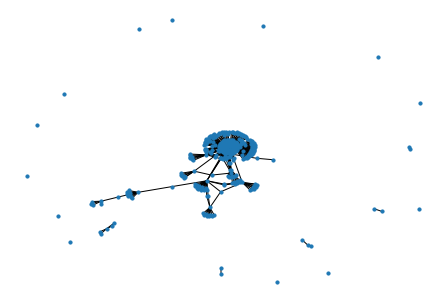



----------------------ITERATION 6 -----------------------
Edge removed  4903.0  to  5121
Edge removed  5112.0  to  3691
Edge removed  5112.0  to  3310
Edge removed  5112.0  to  912
Edge removed  5112.0  to  2523
Community 1  Number of nodes 1 Nodes :  {3475}
Community 2  Number of nodes 1 Nodes :  {2849.0}
Community 3  Number of nodes 1 Nodes :  {3106.0}
Community 4  Number of nodes 1 Nodes :  {808.0}
Community 5  Number of nodes 1 Nodes :  {4555.0}
Community 6  Number of nodes 1 Nodes :  {3563.0}
Community 7  Number of nodes 1 Nodes :  {1527.0}
Community 8  Number of nodes 1 Nodes :  {3327.0}
Community 9  Number of nodes 1 Nodes :  {402}
Community 10  Number of nodes 1 Nodes :  {4066.0}
Community 11  Number of nodes 1 Nodes :  {3908.0}
Community 12  Number of nodes 1 Nodes :  {2820.0}
Community 13  Number of nodes 1 Nodes :  {4903.0}
Community 14  Number of nodes 1 Nodes :  {715.0}
Community 15  Number of nodes 339 Nodes :  {2068.0, 4120.0, 4128.0, 4129.0, 2089.0, 4142.0, 2103.0, 41

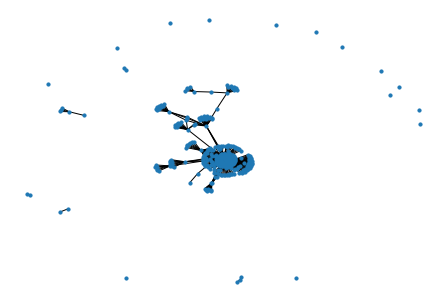

In [ ]:
dataset=df.head(1000)
G = nx.from_pandas_edgelist(dataset,source="From",target="To")
G,A = girvan(G,6,5,True)

### Execution 3 : Entire graph , 6 iterations , remove 5 edges per iteration

----------------------ITERATION 0 -----------------------
Community 1  Number of nodes 5201 Nodes :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201

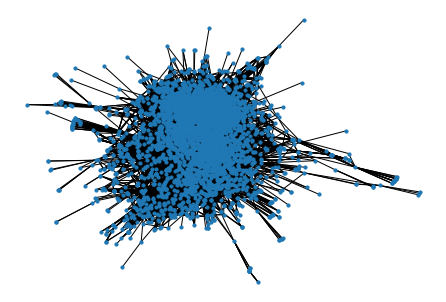



----------------------ITERATION 1 -----------------------
Edge removed  3475  to  2849
Edge removed  3475  to  3106
Edge removed  3475  to  808


In [ ]:
G = nx.from_pandas_edgelist(df,source="From",target="To")
G,A = girvan(G,6,5,True)

### Execution 4 : Entire graph , 6 iterations , remove 1 edge per iteration

198493
list
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

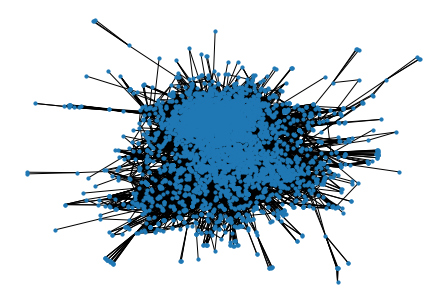


list
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

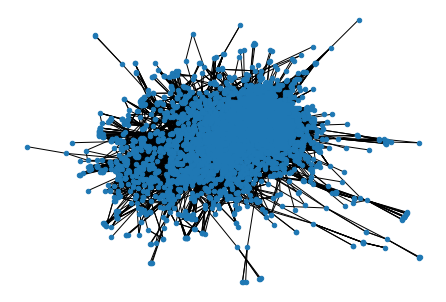


list
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

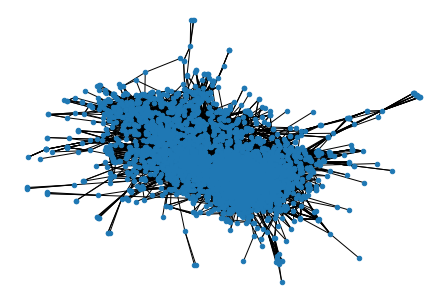


list
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

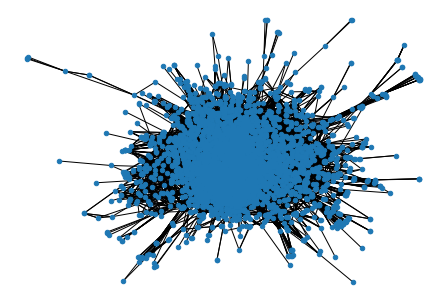


list
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

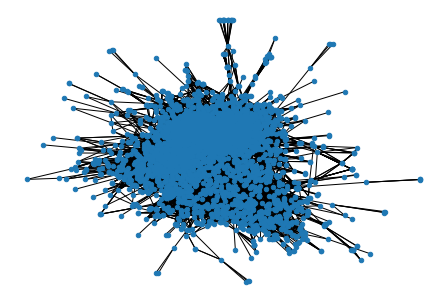


list
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

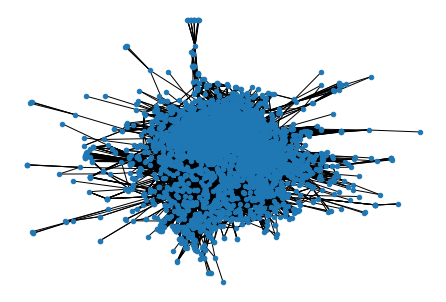


list
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

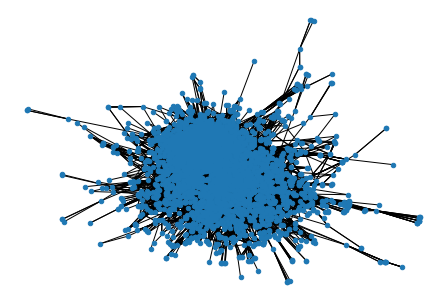

In [ ]:
G = nx.from_pandas_edgelist(df,source="From",target="To")
print(G.number_of_edges())
G,A = girvan(G,6,1,False)